In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [5]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [6]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3).zip


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
!ls "/content/drive/MyDrive/datasets/NSL-KDD"
!ls "/content/drive/MyDrive/datasets/CICIDS"


index.html	 KDDTest-21.txt  KDDTrain1.jpg		   KDDTrain+.arff
KDDTest1.jpg	 KDDTest+.arff	 KDDTrain+_20Percent.arff  KDDTrain+.txt
KDDTest-21.arff  KDDTest+.txt	 KDDTrain+_20Percent.txt   nsl-kdd
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv


In [13]:
import pandas as pd

# NSL-KDD
nsl_train = pd.read_csv("/content/drive/MyDrive/datasets/NSL-KDD/KDDTrain+.txt", header=None)
print("NSL-KDD Train shape:", nsl_train.shape)

# CICIDS (one file)
cicids_ddos = pd.read_csv("/content/drive/MyDrive/datasets/CICIDS/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
print("CICIDS DDoS shape:", cicids_ddos.shape)


NSL-KDD Train shape: (125973, 43)
CICIDS DDoS shape: (225745, 79)


In [ ]:
import pandas as pd

# === NSL-KDD ===
nsl_train = pd.read_csv("/content/drive/MyDrive/datasets/NSL-KDD/KDDTrain+.txt", header=None)
nsl_test  = pd.read_csv("/content/drive/MyDrive/datasets/NSL-KDD/KDDTest+.txt", header=None)

print("NSL-KDD Train shape:", nsl_train.shape)
print("NSL-KDD Test shape:", nsl_test.shape)


cicids_ddos = pd.read_csv("/content/drive/MyDrive/datasets/CICIDS/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
print("CICIDS DDoS shape:", cicids_ddos.shape)


NSL-KDD Train shape: (125973, 43)
NSL-KDD Test shape: (22544, 43)
CICIDS DDoS shape: (225745, 79)


In [16]:
nsl_columns= (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])
nsl_train.columns = nsl_columns
nsl_test.columns = nsl_columns

print(nsl_train.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

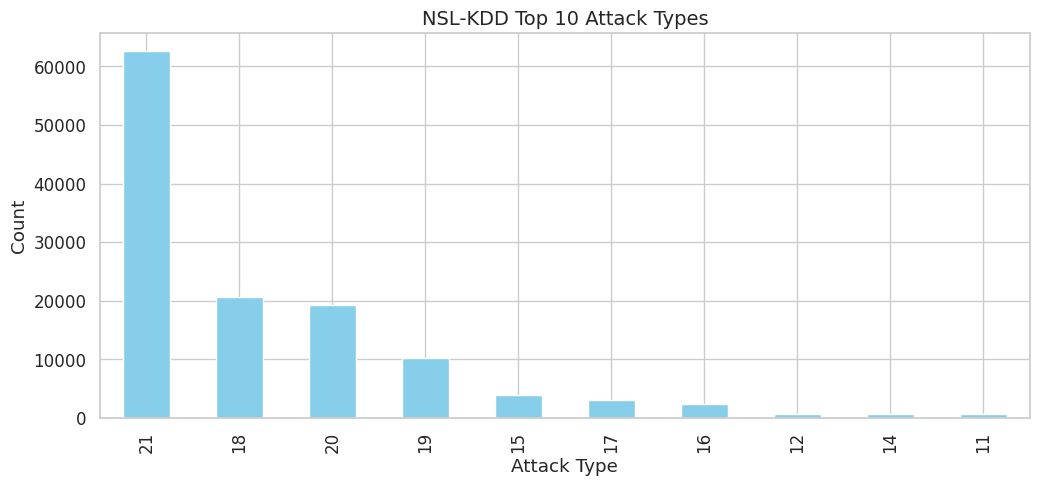

In [28]:
def plot_label_distribution(df, label_col, title):
    plt.figure(figsize=(12,5))
    df[label_col].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(title, fontsize=14)
    plt.ylabel("Count")
    plt.xlabel("Attack Type")
    plt.show()

plot_label_distribution(nsl_train, "level", "NSL-KDD Top 10 Attack Types")

In [ ]:
attack_category_map = {
    # DoS
    'back': 'DoS', 'land': 'DoS', 'neptune': 'DoS', 'pod': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS',
    # Probe
    'satan': 'Probe', 'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe',
    # R2L
    'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'imap': 'R2L', 'multihop': 'R2L', 'phf': 'R2L',
    'spy': 'R2L', 'warezclient': 'R2L', 'warezmaster': 'R2L',
    # U2R
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R',
}


nsl_train['attack_category'] = nsl_train['level'].apply(
    lambda x: attack_category_map.get(x, 'Normal')
)

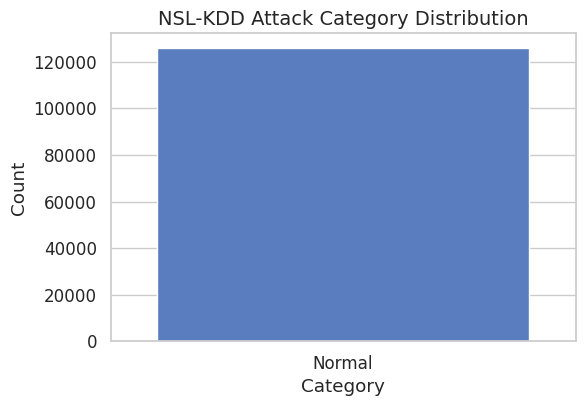

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data=nsl_train, x="attack_category", order=nsl_train["attack_category"].value_counts().index)
plt.title("NSL-KDD Attack Category Distribution", fontsize=14)
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

In [ ]:

categorical_features = nsl_train.select_dtypes(include=["object"]).columns.tolist()
numerical_features = nsl_train.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features[:10], "...")  


Categorical features: ['protocol_type', 'service', 'flag', 'outcome', 'attack_category']
Numerical features: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised'] ...


In [ ]:

print("\nMissing values:\n", nsl_train.isnull().sum().sort_values(ascending=False).head(10))


num_duplicates = nsl_train.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")



Missing values:
 duration          0
protocol_type     0
service           0
flag              0
src_bytes         0
dst_bytes         0
land              0
wrong_fragment    0
urgent            0
hot               0
dtype: int64

Number of duplicate rows: 0


In [39]:
categorical_cols = nsl_train.select_dtypes(include=['object']).columns
print("Categorical features:", categorical_cols.tolist())

Categorical features: ['protocol_type', 'service', 'flag', 'outcome', 'attack_category']


In [ ]:
import pandas as pd

schema_mapping = []

for col in nsl_train.columns:
    if col in categorical_features:
        dtype = "categorical"
        action = "One-Hot Encoding"
    else:
        dtype = "numerical"
        # If binary (only 0/1)
        if set(nsl_train[col].unique()) <= {0,1}:
            dtype = "binary"
            action = "Keep as is"
        else:
            action = "Standardize/Normalize"

    if col in ["duration", "src_bytes", "dst_bytes"]:
        semantic = "traffic"
    elif col in ["protocol_type", "service", "flag"]:
        semantic = "connection behavior"
    elif col in ["land", "logged_in", "root_shell", "su_attempted"]:
        semantic = "privilege/authentication"
    else:
        semantic = "misc/system"

    schema_mapping.append([col, dtype, action, semantic])

schema_df = pd.DataFrame(schema_mapping, columns=["Feature", "Type", "Preprocessing Action", "Semantic Category"])
print(schema_df.head(15))
nsl_train_encoded = pd.get_dummies(nsl_train, columns=categorical_cols, drop_first=True)


              Feature         Type   Preprocessing Action  \
0            duration    numerical  Standardize/Normalize   
1       protocol_type  categorical       One-Hot Encoding   
2             service  categorical       One-Hot Encoding   
3                flag  categorical       One-Hot Encoding   
4           src_bytes    numerical  Standardize/Normalize   
5           dst_bytes    numerical  Standardize/Normalize   
6                land       binary             Keep as is   
7      wrong_fragment    numerical  Standardize/Normalize   
8              urgent    numerical  Standardize/Normalize   
9                 hot    numerical  Standardize/Normalize   
10  num_failed_logins    numerical  Standardize/Normalize   
11          logged_in       binary             Keep as is   
12    num_compromised    numerical  Standardize/Normalize   
13         root_shell       binary             Keep as is   
14       su_attempted    numerical  Standardize/Normalize   

           Semantic Cat

In [ ]:
print("\n===== CICIDS2017 Sample Schema =====")
print(cicids_ddos.info())

print("\nNumber of features: ", cicids_ddos.shape[1])
print("Example columns:", cicids_ddos.columns[:15].tolist())


print("\nNSL-KDD features:", len(nsl_train.columns))
print("CICIDS2017 features:", len(cicids_ddos.columns))



===== CICIDS2017 Sample Schema =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd P

In [36]:
schema_comparison = pd.DataFrame({
    "Dataset": ["NSL-KDD", "CICIDS2017"],
    "Features Count": [len(nsl_train.columns), len(cicids_ddos.columns)],
    "Feature Types": ["Categorical + Numeric mix (~40)", "Mostly numeric flow stats (~80+)"],
    "Label granularity": ["Attack types (22) grouped into 4 categories", "Fine-grained attack types (DoS, DDoS, Brute Force, Botnet, etc.)"]
})

print(schema_comparison)


      Dataset  Features Count                     Feature Types  \
0     NSL-KDD              44   Categorical + Numeric mix (~40)   
1  CICIDS2017              79  Mostly numeric flow stats (~80+)   

                                   Label granularity  
0        Attack types (22) grouped into 4 categories  
1  Fine-grained attack types (DoS, DDoS, Brute Fo...  


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = nsl_train_encoded.select_dtypes(include=['int64','float64']).columns

nsl_train_encoded[numerical_cols] = scaler.fit_transform(nsl_train_encoded[numerical_cols])

print("Final dataset shape after preprocessing:", nsl_train_encoded.shape)
nsl_train_encoded.head()

Final dataset shape after preprocessing: (125973, 142)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,outcome_phf,outcome_pod,outcome_portsweep,outcome_rootkit,outcome_satan,outcome_smurf,outcome_spy,outcome_teardrop,outcome_warezclient,outcome_warezmaster
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
